In [34]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *
from figures.plotsettings import *

import numpy as np
import matplotlib.pyplot as plt

src = "/home/jovyan/jupyterhub-shared/Wouter/simulation_data/"

# TLS, single-tone

$$\frac{\epsilon_d}{2\cdot 2\pi}=0.1$$ 

In [35]:
Tslr = src + "data_191107_194613_red_Nq2_Nt1_Om0.2_wd1.273_wq6.5_wc4.0_wsb0.0007"
Tslb = src + "data_191107_201955_blue_Nq2_Nt1_Om0.2_wd5.278_wq6.5_wc4.0_wsb0.003"
Tssr = src + "data_191108_083540_red_Nq2_Nt1_Om0.2_wd1.257_wq4.0_wc6.5_wsb0.0005"
Tssb = src + "data_191107_202828_blue_Nq2_Nt1_Om0.2_wd5.231_wq4.0_wc6.5_wsb0.0019"

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']

Tslr_times, _, Tslr_expect, Tslr_e0, Tslr_g1, _      , _      , _ = load_data(quants, Tslr)
Tslb_times, _, Tslb_expect, _      , _      , Tslb_e1, Tslb_g0, _ = load_data(quants, Tslb)
Tssr_times, _, Tssr_expect, Tssr_e0, Tssr_g1, _      , _      , _ = load_data(quants, Tssr)
Tssb_times, _, Tssb_expect, _      , _      , Tssb_e1, Tssb_g0, _ = load_data(quants, Tssb)

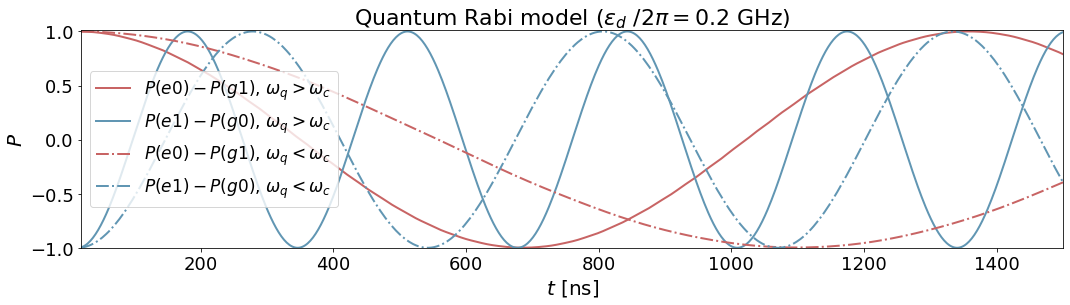

In [36]:
fig, ax1 = plt.subplots(figsize=(22,4))

Tslr_plot = ax1.plot(Tslr_times, Tslr_e0-Tslr_g1, ls=linestyles['larger'],  c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q > \\omega_c$")
Tslb_plot = ax1.plot(Tslb_times, Tslb_e1-Tslb_g0, ls=linestyles['larger'],  c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q > \\omega_c$")
Tssr_plot = ax1.plot(Tssr_times, Tssr_e0-Tssr_g1, ls=linestyles['smaller'], c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q < \\omega_c$")
Tssb_plot = ax1.plot(Tssb_times, Tssb_e1-Tssb_g0, ls=linestyles['smaller'], c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q < \\omega_c$")
ax1.set_xlim([20, 1500])
ax1.set_ylim([-1, 1.01])

ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Quantum Rabi model ($\\epsilon_d$ $/2\\pi = 0.2$ GHz)")
plots = Tslr_plot + Tslb_plot + Tssr_plot + Tssb_plot
labels = [plot.get_label() for plot in plots]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax1.legend(plots, labels, loc='center left', bbox_to_anchor=(1.01, 0.5))
ax1.legend(plots, labels, loc='center left')
plt.show()

# TLS, double-tone

$$\frac{\epsilon_q}{2\cdot 2\pi}=0.025$$

$$\frac{\epsilon_q}{2\cdot 2\pi}=0.317$$ 

In [37]:
Tdlr = src + "data_191107_155905_red_Nq2_Nt2_Omq0.05_wdq6.125_Omc0.63_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0061"
Tdlb = src + "data_191107_160042_blue_Nq2_Nt2_Omq0.05_wdq7.12_Omc0.63_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0049"
Tdsr = src + "data_191107_170843_red_Nq2_Nt2_Omq0.05_wdq3.401_Omc0.63_wdc6.0_dw0.5_wq4.0_wc6.5_wsb0.0038"
Tdsb = src + "data_191107_174517_blue_Nq2_Nt2_Omq0.05_wdq4.396_Omc0.63_wdc6.0_dw0.5_wq4.0_wc6.5_wsb0.0045"

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']

Td_times, _, Tdlr_expect, Tdlr_e0, Tdlr_g1, _      , _      , _ = load_data(quants, Tdlr)
_,        _, Tdlb_expect, _      , _      , Tdlb_e1, Tdlb_g0, _ = load_data(quants, Tdlb)
_,        _, Tdsr_expect, Tdsr_e0, Tdsr_g1, _      , _      , _ = load_data(quants, Tdsr)
_,        _, Tdsb_expect, _      , _      , Tdsb_e1, Tdsb_g0, _ = load_data(quants, Tdsb)

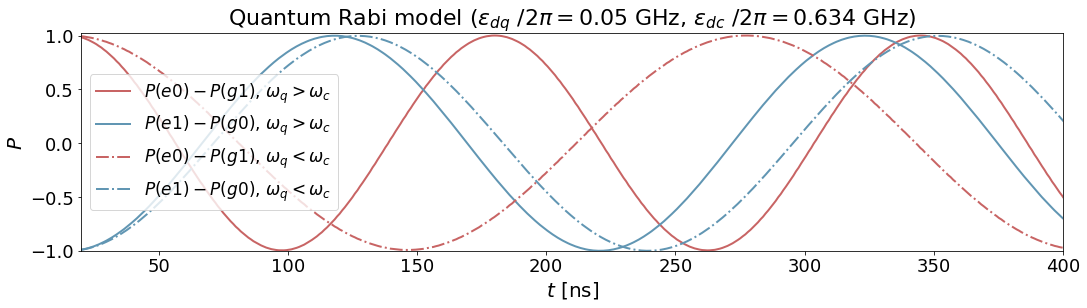

In [38]:
fig, ax1 = plt.subplots(figsize=[22,4])

Tdlr_plot = ax1.plot(Td_times, Tdlr_e0-Tdlr_g1, '-', c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q > \\omega_c$")
Tdlb_plot = ax1.plot(Td_times, Tdlb_e1-Tdlb_g0, '-', c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q > \\omega_c$")
Tdsr_plot = ax1.plot(Td_times, Tdsr_e0-Tdsr_g1, '-.', c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q < \\omega_c$")
Tdsb_plot = ax1.plot(Td_times, Tdsb_e1-Tdsb_g0, '-.', c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q < \\omega_c$")
ax1.set_xlim([20, 400])
ax1.set_ylim([-1, 1.02])

ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Quantum Rabi model ($\\epsilon_{dq}$ $/2\\pi = 0.05$ GHz, $\\epsilon_{dc}$ $/2\\pi = 0.634$ GHz)")
plots = Tdlr_plot + Tdlb_plot + Tdsr_plot + Tdsb_plot
labels = [plot.get_label() for plot in plots]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax1.legend(plots, labels, loc='center left', bbox_to_anchor=(1.05, 0.5))
ax1.legend(plots, labels, loc='center left')
plt.show()

# Kerr, single-tone

$$\frac{\epsilon_d}{2\cdot 2\pi}=0.3$$

In [39]:
tslr = src + "data_191118_235753_red_Nq10_Nt1_Om0.6_wd1.265_wq6.5_wc4.0_wsb0.0"
tslb = src + "data_191112_174750_blue_Nq10_Nt1_Om0.6_wd5.232_wq6.5_wc4.0_wsb0.002"
tssr = src + "data_191118_235910_red_Nq10_Nt1_Om0.6_wd1.269_wq4.0_wc6.5_wsb0.0004"
tssb = src + "data_191115_215947_blue_Nq10_Nt1_Om0.6_wd5.235_wq4.0_wc6.5_wsb0.0017"

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']

ts_times, _, tslr_expect, tslr_e0, tslr_g1, _      , _      , _ = load_data(quants, tslr)
_,        _, tslb_expect, _      , _      , tslb_e1, tslb_g0, _ = load_data(quants, tslb)
_,        _, tssr_expect, tssr_e0, tssr_g1, _      , _      , _ = load_data(quants, tssr)
_,        _, tssb_expect, _      , _      , tssb_e1, tssb_g0, _ = load_data(quants, tssb)

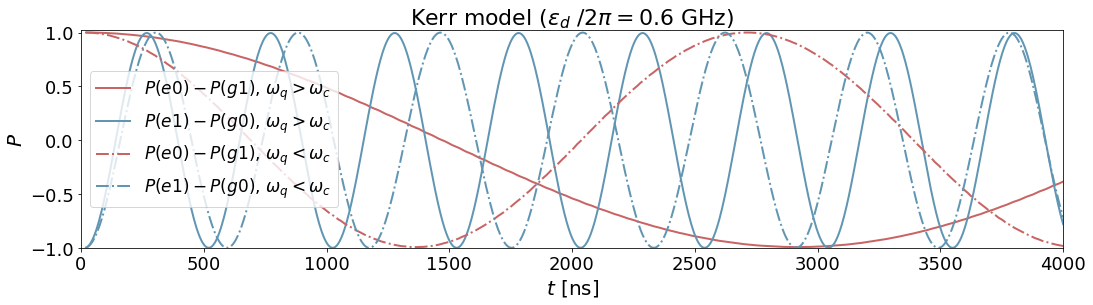

In [40]:
fig, ax1 = plt.subplots(figsize=[22,4])

tslr_plot = ax1.plot(ts_times, tslr_e0-tslr_g1, ls=linestyles['larger'], c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q > \\omega_c$")
tslb_plot = ax1.plot(ts_times, tslb_e1-tslb_g0, ls=linestyles['larger'], c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q > \\omega_c$")
tssr_plot = ax1.plot(ts_times, tssr_e0-tssr_g1, ls=linestyles['smaller'], c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q < \\omega_c$")
tssb_plot = ax1.plot(ts_times, tssb_e1-tssb_g0, ls=linestyles['smaller'], c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q < \\omega_c$")
ax1.set_xlim([0, 4000])
ax1.set_ylim([-1, 1.02])

ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Kerr model ($\\epsilon_d$ $/2\\pi = 0.6$ GHz)")
plots = tslr_plot + tslb_plot + tssr_plot + tssb_plot
labels = [plot.get_label() for plot in plots]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax1.legend(plots, labels, loc='center left', bbox_to_anchor=(1.05, 0.5))
ax1.legend(plots, labels, loc='center left')
plt.show()

# Kerr, double-tone

$$\frac{\epsilon_q}{2\cdot 2\pi}=0.0375$$

$$\frac{\epsilon_q}{2\cdot 2\pi}=0.4755$$ 

In [41]:
tdlr = src + "data_191118_235831_red_Nq10_Nt2_Omq0.08_wdq6.015_Omc0.95_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0009"
tdlb = src + "data_191117_225659_blue_Nq10_Nt2_Omq0.08_wdq6.975_Omc0.95_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0009"
tdsr = src + "data_191117_225604_red_Nq10_Nt2_Omq0.08_wdq3.445_Omc0.95_wdc6.0_dw0.5_wq4.0_wc6.5_wsb0.001"
tdsb = src + "data_191117_225541_blue_Nq10_Nt2_Omq0.08_wdq4.468_Omc0.95_wdc6.0_dw0.5_wq4.0_wc6.5_wsb0.001"

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']

td_times, _, tdlr_expect, tdlr_e0, tdlr_g1, _      , _      , _ = load_data(quants, tdlr)
_,        _, tdlb_expect, _      , _      , tdlb_e1, tdlb_g0, _ = load_data(quants, tdlb)
_,        _, tdsr_expect, tdsr_e0, tdsr_g1, _      , _      , _ = load_data(quants, tdsr)
_,        _, tdsb_expect, _      , _      , tdsb_e1, tdsb_g0, _ = load_data(quants, tdsb)

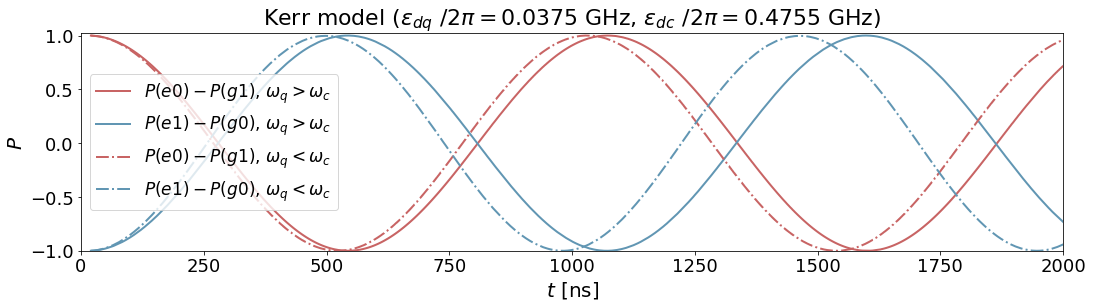

In [42]:
fig, ax1 = plt.subplots(figsize=[22,4])

tdlr_plot = ax1.plot(td_times, tdlr_e0-tdlr_g1, ls=linestyles['larger'], c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q > \\omega_c$")
tdlb_plot = ax1.plot(td_times, tdlb_e1-tdlb_g0, ls=linestyles['larger'], c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q > \\omega_c$")
tdsr_plot = ax1.plot(td_times, tdsr_e0-tdsr_g1, ls=linestyles['smaller'], c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q < \\omega_c$")
tdsb_plot = ax1.plot(td_times, tdsb_e1-tdsb_g0, ls=linestyles['smaller'], c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q < \\omega_c$")
ax1.set_xlim([0, 2000])
ax1.set_ylim([-1, 1.02])

ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Kerr model ($\\epsilon_{dq}$ $/2\\pi = 0.0375$ GHz, $\\epsilon_{dc}$ $/2\\pi = 0.4755$ GHz)")
plots =  tdlr_plot + tdlb_plot + tdsr_plot + tdsb_plot
labels = [plot.get_label() for plot in plots]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax1.legend(plots, labels, loc='center left', bbox_to_anchor=(1.05, 0.5))
ax1.legend(plots, labels, loc='center left')
plt.show()

# Duffing, single-tone

$$\frac{\epsilon_d}{2\cdot 2\pi}=0.3$$

In [43]:
Dslr = src + "data_191109_122801_red_Nq10_Nt1_Om0.6_wd1.257_wq6.5_wc4.0_wsb0.0005"
Dslb = src + "data_191108_084954_blue_Nq10_Nt1_Om0.6_wd5.216_wq6.5_wc4.0_wsb0.0037"
Dssr = src + "data_191108_120317_red_Nq10_Nt1_Om0.6_wd1.288_wq4.0_wc6.5_wsb0.0011"
Dssb = src + "data_191108_085415_blue_Nq10_Nt1_Om0.6_wd5.223_wq4.0_wc6.5_wsb0.0013"

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']

Ds_times, _, Dslr_expect, Dslr_e0, Dslr_g1, _      , _      , _ = load_data(quants, Dslr)
_,        _, Dslb_expect, _      , _      , Dslb_e1, Dslb_g0, _ = load_data(quants, Dslb)
_,        _, Dssr_expect, Dssr_e0, Dssr_g1, _      , _      , _ = load_data(quants, Dssr)
_,        _, Dssb_expect, _      , _      , Dssb_e1, Dssb_g0, _ = load_data(quants, Dssb)

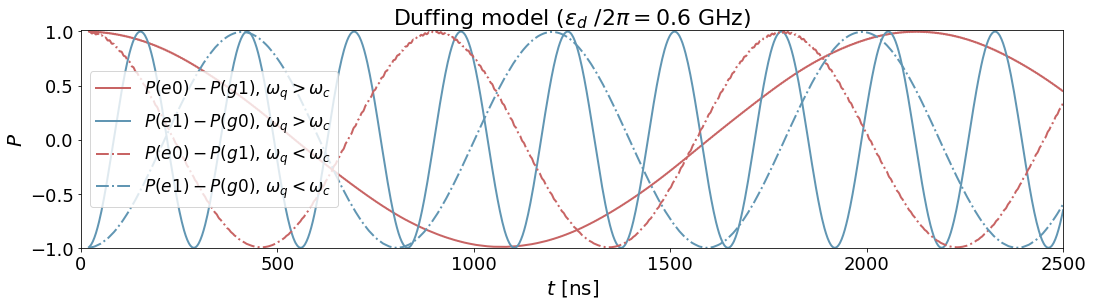

In [44]:
fig, ax1 = plt.subplots(figsize=[22,4])

Dslr_plot = ax1.plot(Ds_times, Dslr_e0-Dslr_g1, ls=linestyles['larger'], c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q > \\omega_c$")
Dslb_plot = ax1.plot(Ds_times, Dslb_e1-Dslb_g0, ls=linestyles['larger'], c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q > \\omega_c$")
Dssr_plot = ax1.plot(Ds_times, Dssr_e0-Dssr_g1, ls=linestyles['smaller'], c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q < \\omega_c$")
Dssb_plot = ax1.plot(Ds_times, Dssb_e1-Dssb_g0, ls=linestyles['smaller'], c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q < \\omega_c$")
ax1.set_xlim([0, 2500])
ax1.set_ylim([-1, 1.01])

ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Duffing model ($\\epsilon_d$ $/2\\pi = 0.6$ GHz)")
plots = Dslr_plot + Dslb_plot + Dssr_plot + Dssb_plot
labels = [plot.get_label() for plot in plots]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax1.legend(plots, labels, loc='center left', bbox_to_anchor=(1.05, 0.5))
ax1.legend(plots, labels, loc='center left')
plt.show()

# Duffing, double-tone

$$\frac{\epsilon_q}{2\cdot 2\pi}=0.0375$$

$$\frac{\epsilon_q}{2\cdot 2\pi}=0.4755$$ 

In [45]:
Ddlr = src + "data_191109_122825_red_Nq10_Nt2_Omq0.08_wdq5.988_Omc0.95_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0019"
Ddlb = src + "data_191108_123933_blue_Nq10_Nt2_Omq0.08_wdq6.946_Omc0.95_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0018"
Ddsr = src + "data_200212_173335_red_Nq10_Nt2_epsq0.08_wdq3.418_epsc0.95_wdc6.0_wq4.0_wc6.5_wsb0.0009"
Ddsb = src + "data_200212_235405_blue_Nq10_Nt2_epsq0.08_wdq4.447_epsc0.95_wdc6.0_wq4.0_wc6.5_wsb0.0008"

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']

Ddl_times,  _, Ddlr_expect, Ddlr_e0, Ddlr_g1, _      , _      , _ = load_data(quants, Ddlr)
_,          _, Ddlb_expect, _      , _      , Ddlb_e1, Ddlb_g0, _ = load_data(quants, Ddlb)
Ddsr_times, _, Ddsr_expect, Ddsr_e0, Ddsr_g1, _      , _      , _ = load_data(quants, Ddsr)
Ddsb_times, _, Ddsb_expect, _      , _      , Ddsb_e1, Ddsb_g0, _ = load_data(quants, Ddsb)

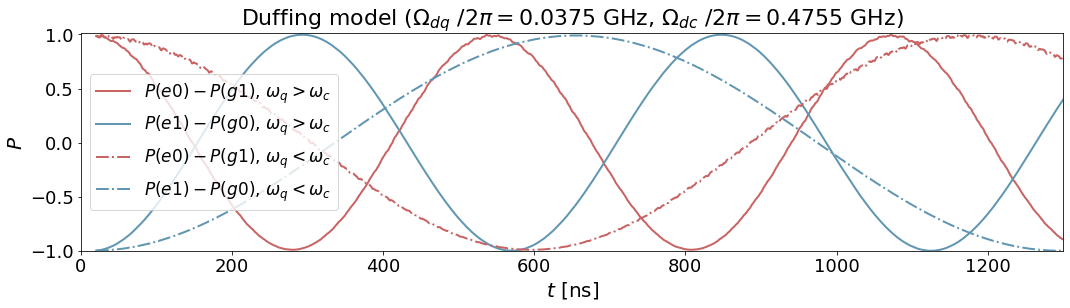

In [46]:
fig, ax1 = plt.subplots(figsize=[22,4])

Ddlr_plot = ax1.plot(Ddl_times, Ddlr_e0-Ddlr_g1, ls=linestyles['larger'], c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q > \\omega_c$")
Ddlb_plot = ax1.plot(Ddl_times, Ddlb_e1-Ddlb_g0, ls=linestyles['larger'], c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q > \\omega_c$")
Ddsr_plot = ax1.plot(Ddsr_times, Ddsr_e0-Ddsr_g1, ls=linestyles['smaller'], c=plotcolours['sbred'], alpha=alpha, label="$P(e0)-P(g1)$, $\\omega_q < \\omega_c$")
Ddsb_plot = ax1.plot(Ddsb_times, Ddsb_e1-Ddsb_g0, ls=linestyles['smaller'], c=plotcolours['sbblue'], alpha=alpha, label="$P(e1)-P(g0)$, $\\omega_q < \\omega_c$")
ax1.set_xlim([0, 1300])
ax1.set_ylim([-1, 1.01])

ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Duffing model ($\\Omega_{dq}$ $/2\\pi = 0.0375$ GHz, $\\Omega_{dc}$ $/2\\pi = 0.4755$ GHz)")
plots =  Ddlr_plot + Ddlb_plot + Ddsr_plot + Ddsb_plot
labels = [plot.get_label() for plot in plots]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax1.legend(plots, labels, loc='center left', bbox_to_anchor=(1.05, 0.5))
ax1.legend(plots, labels, loc='center left')
plt.show()

# Red vs blue

In [47]:
Tslr2 = src + "data_200220_083053_red_Nq2_Nt1_eps0.6_wd1.297_wq6.5_wc4.0_wsb0.0065"
Tslb2 = src + "data_200220_091149_blue_Nq2_Nt1_eps0.6_wd5.345_wq6.5_wc4.0_wsb0.0257"
Dslr2 = src + "data_200313_141838_red_Nq10_Nt1_eps0.6_wd1.257_wq6.5_wc4.0_wsb0.0005"
tslr2 = src + ""

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']

Tslr2_times, _, Tslr2_expect, Tslr2_e0, Tslr2_g1, _       , _       , _ = load_data(quants, Tslr2)
Tslb2_times, _, Tslb2_expect, _       , _       , Tslb2_e1, Tslb2_g0, _ = load_data(quants, Tslb2)

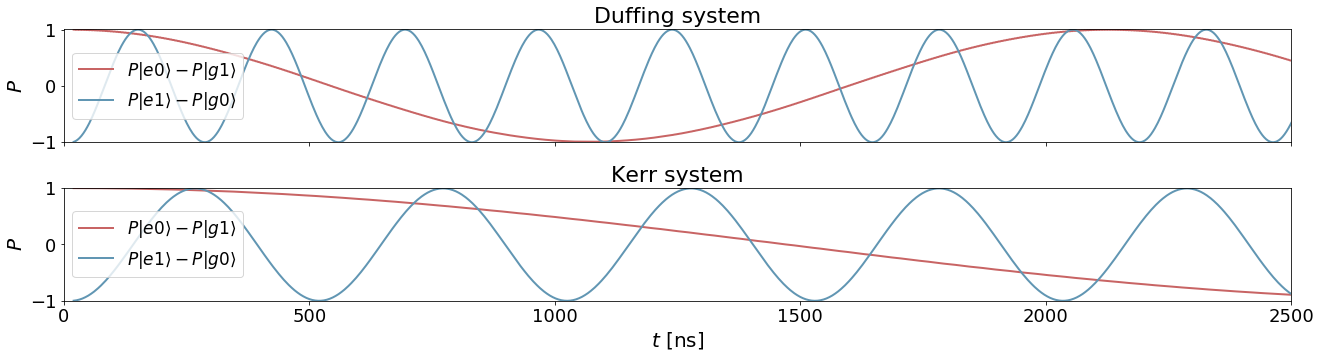

In [48]:
fig, axes = plt.subplots(2, 1, figsize=[22, 5])

ax1 = axes[0]
Dslr_plot = ax1.plot(Ds_times, Dslr_e0-Dslr_g1, ls=linestyles['larger'], c=plotcolours['sbred'], alpha=alpha, label="$P\\left|e0\\right>-P\\left|g1\\right>$")
Dslb_plot = ax1.plot(Ds_times, Dslb_e1-Dslb_g0, ls=linestyles['larger'], c=plotcolours['sbblue'], alpha=alpha, label="$P\\left|e1\\right>-P\\left|g0\\right>$")
ax1.set_xlim([0, 2500])
ax1.set_ylim([-1, 1.01])
ax1.set_xticklabels([])
# ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Duffing system")
plots =  Dslr_plot + Dslb_plot
labels = [plot.get_label() for plot in plots]
ax1.legend(plots, labels, loc='center left')

ax2 = axes[1]
tslr_plot = ax2.plot(ts_times, tslr_e0-tslr_g1, ls=linestyles['larger'], c=plotcolours['sbred'], alpha=alpha, label="$P\\left|e0\\right>-P\\left|g1\\right>$")
tslb_plot = ax2.plot(ts_times, tslb_e1-tslb_g0, ls=linestyles['larger'], c=plotcolours['sbblue'], alpha=alpha, label="$P\\left|e1\\right>-P\\left|g0\\right>$")
ax2.set_xlim([0, 2500])
ax2.set_ylim([-1, 1.01])
ax2.set_xlabel("$t$ [ns]")
ax2.set_ylabel("$P$")
ax2.set_title("Kerr system")
plots =  tslr_plot + tslb_plot
labels = [plot.get_label() for plot in plots]
ax2.legend(plots, labels, loc='center left')

plt.subplots_adjust(hspace=0.40)
plt.show()

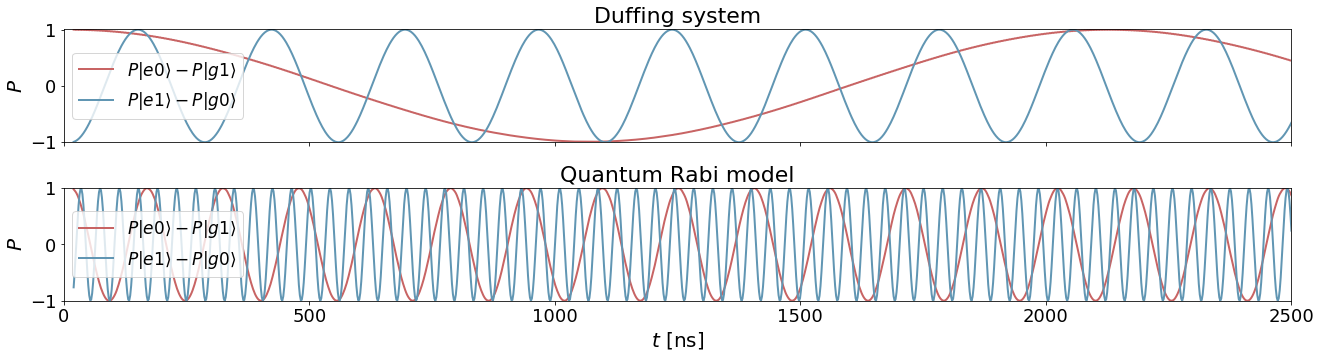

In [49]:
Tslr = src + "data_200220_083053_red_Nq2_Nt1_eps0.6_wd1.297_wq6.5_wc4.0_wsb0.0065"
Tslb = src + "data_200220_091149_blue_Nq2_Nt1_eps0.6_wd5.345_wq6.5_wc4.0_wsb0.0257"
quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']
Tslr_times, _, Tslr_expect, Tslr_e0, Tslr_g1, _      , _      , _ = load_data(quants, Tslr)
Tslb_times, _, Tslb_expect, _      , _      , Tslb_e1, Tslb_g0, _ = load_data(quants, Tslb)

fig, axes = plt.subplots(2, 1, figsize=[22, 5])

ax1 = axes[0]
Dslr_plot = ax1.plot(Ds_times, Dslr_e0-Dslr_g1, ls=linestyles['larger'], c=plotcolours['sbred'], alpha=alpha, label="$P\\left|e0\\right>-P\\left|g1\\right>$")
Dslb_plot = ax1.plot(Ds_times, Dslb_e1-Dslb_g0, ls=linestyles['larger'], c=plotcolours['sbblue'], alpha=alpha, label="$P\\left|e1\\right>-P\\left|g0\\right>$")
ax1.set_xlim([0, 2500])
ax1.set_ylim([-1, 1.01])
ax1.set_xticklabels([])
# ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Duffing system")
plots =  Dslr_plot + Dslb_plot
labels = [plot.get_label() for plot in plots]
ax1.legend(plots, labels, loc='center left')

ax2 = axes[1]
Tslr_plot = ax2.plot(Tslr_times, Tslr_e0-Tslr_g1, ls=linestyles['larger'], c=plotcolours['sbred'], alpha=alpha, label="$P\\left|e0\\right>-P\\left|g1\\right>$")
Tslb_plot = ax2.plot(Tslb_times, Tslb_e1-Tslb_g0, ls=linestyles['larger'], c=plotcolours['sbblue'], alpha=alpha, label="$P\\left|e1\\right>-P\\left|g0\\right>$")
ax2.set_xlim([0, 2500])
ax2.set_ylim([-1, 1.01])
ax2.set_xlabel("$t$ [ns]")
ax2.set_ylabel("$P$")
ax2.set_title("Quantum Rabi model")
plots =  Tslr_plot + Tslb_plot
labels = [plot.get_label() for plot in plots]
ax2.legend(plots, labels, loc='center left')

plt.subplots_adjust(hspace=0.40)
plt.show()